# Mini exercise in object identification

I followed the tutorial and code example to use OpenCV to identify the traffic light 

Code example referenced from: 
https://github.com/HevLfreis/TrafficLight-Detector

OpenCV example taken from:
https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

Images searched from google. The images are solely used for the pedagogical use of the object identification algorithm. 
1. Image 1: https://www.ksat.com/news/local/2021/03/04/new-traffic-signals-planned-for-several-san-antonio-intersections-in-effort-to-reduce-number-of-serious-crashes/
2. Image 2: https://www.twenty20.com/photos/91eb4d85-b95c-4674-830c-e2b59092be7c
3. Image 3: https://www.baltimoresun.com/ask/bs-ask-traffic-lights-20191015-ietjxqoqkngcvle6xywze65f2e-story.html

The idea is to use the Hough Circle to identify the circle, with specific colour filter to identify red and green circles. Then we justify their identity by their position and how red and green the signals are. 

Prepared by Shing Chi Leung at 13 Oct 2021

In [13]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [154]:
def detect_light(filename):
    
    img = cv2.imread(filename)
    
    # the opencv read the color in RGB sequence, but 
    # the source jpeg file stores in BGR sequence
    cimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # miscellaneous setting
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # image size
    size = img.shape
    
    print("image size: {}".format(size))
    
    # mask for colours in hsv
    lower_red1 = np.array([0,100,100])
    upper_red1 = np.array([10,255,255])
    lower_red2 = np.array([160,100,100])
    upper_red2 = np.array([180,255,255])
    lower_green = np.array([40,50,50])
    upper_green = np.array([100,255,255])
    lower_yellow = np.array([15,150,150])
    upper_yellow = np.array([35,255,255])
    
    # define masks
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    maskr = cv2.add(mask1, mask2)
    maskg = cv2.inRange(hsv, lower_green, upper_green)
    
    # identify circles
    r_circles = cv2.HoughCircles(maskr, cv2.HOUGH_GRADIENT, 1, 80, param1=50, param2=10, minRadius=0, maxRadius=30)
    g_circles = cv2.HoughCircles(maskg, cv2.HOUGH_GRADIENT, 1, 80, param1=50, param2=10, minRadius=0, maxRadius=30)
    
    # draw boxes around circles
    r = 5
    bound = 0.4
    
    if r_circles is not None:
        
        r_circles = np.uint16(np.around(r_circles))
    
        for i in r_circles[0, :]:
            
            # remove the following signals (irrelevant): 
            # if it is too low (not a traffic light)
            # if it is too large inside the image
            if i[0] > size[1] or i[1] > size[0] or i[1] > size[0]*bound:
                #print("Case 1 elimination: {}".format(i))
                continue

                
            # remove the following signals:
            # the circle which is close to boundary
            #
            # h = the "red" value after masking by maskr
            # s = count of grid inside image near traffic light
            
            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        #print("Case 2 elimination: {}".format(i))
                        continue
                    h += maskr[i[1]+m, i[0]+n]
                    s += 1
                
            if h / s > 50:
                print("Selected red circle {},{},{}".format(i,h,s))
                cv2.rectangle(cimg, (i[0]-i[2], i[1]-i[2]), (i[0]+i[2], i[1]+i[2]), (255,255,0), 1)
                
                
    if g_circles is not None:
        
        g_circles = np.uint16(np.around(g_circles))
    
        for i in g_circles[0, :]:
            
            # remove the following signals (irrelevant): 
            # if it is too low (not a traffic light)
            # if it is too large inside the image
            if i[0] > size[1] or i[1] > size[0] or i[1] > size[0]*bound:
                #print("Case 1 elimination: {}".format(i))
                continue

                
            # remove the following signals:
            # the circle which is close to boundary
            #
            # h = the "green" value after masking by maskg
            # s = count of grid inside image near traffic light
            
            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        #print("Case 2 elimination: {}".format(i))
                        continue
                    h += maskg[i[1]+m, i[0]+n]
                    s += 1
            
            # if it is sufficiently "red" or "green", mark a rectange around it
            if h / s > 50:
                print("Selected green circle {},{},{}".format(i,h,s))
                cv2.rectangle(cimg, (i[0]-i[2], i[1]-i[2]), (i[0]+i[2], i[1]+i[2]), (255,255,0), 1)        
        
    return cimg

## Applications

Then we may apply the method to some online photos I searched beforehead and see the performance. 

image size: (576, 1024, 3)
Selected green circle [612 122   7],25245.0,100.0
Selected green circle [460 126   7],25245.0,100.0
Selected green circle [ 76 208   5],16830.0,100.0


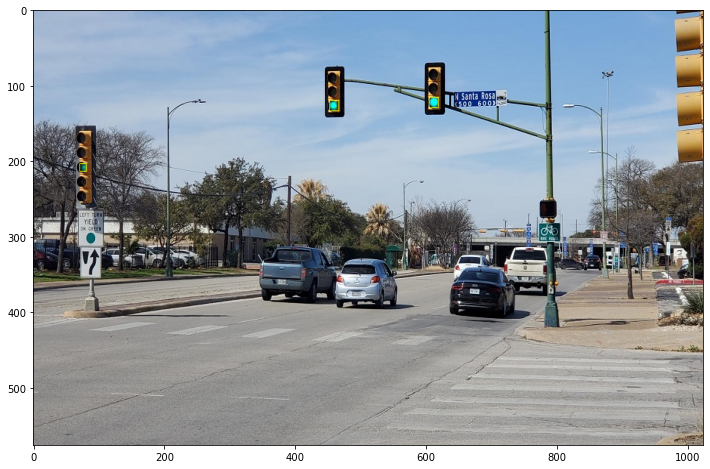

In [155]:
filename = "tlight_image_1.jpg"

img = detect_light(filename)
#img = cv2.imread(filename)

plt.figure(figsize = (12,8))
plt.imshow(img, aspect="auto")

image size: (676, 640, 3)
Selected red circle [392 126  14],25500.0,100.0
Selected red circle [ 60 128  13],25500.0,100.0
Selected green circle [440 184   6],21420.0,100.0
Selected green circle [254 184  16],25500.0,100.0


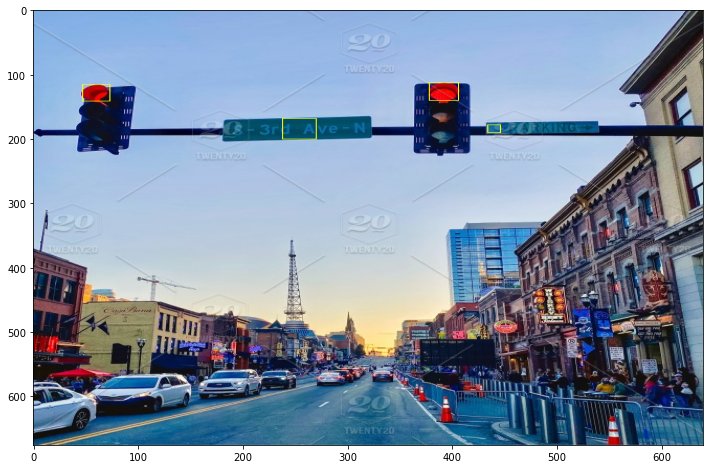

In [153]:
filename = "tlight_image_2.jpg"

img = detect_light(filename)
#img = cv2.imread(filename)

plt.figure(figsize = (12,8))
plt.imshow(img, aspect="auto")

image size: (715, 1200, 3)
Selected red circle [490 206   8],25500.0,100.0
Selected red circle [824 200  10],25500.0,100.0
Selected green circle [716 134  17],25500.0,100.0
Selected green circle [190 152  17],25500.0,100.0
Selected green circle [446 226  27],5355.0,100.0
Selected green circle [224 240  10],13515.0,100.0
Selected green circle [650 238   7],13515.0,100.0


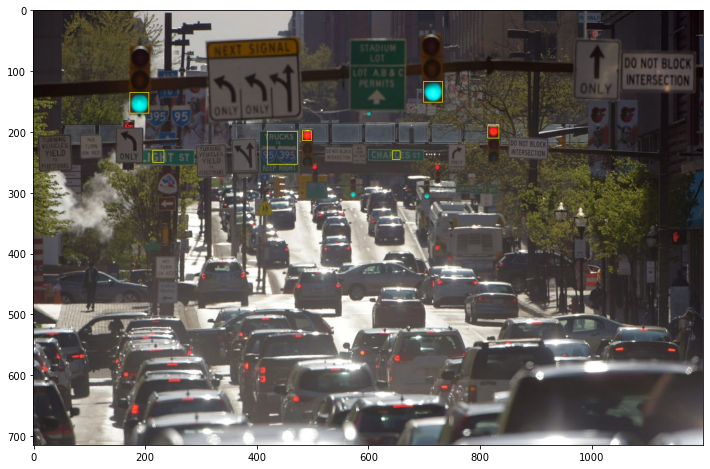

In [150]:
filename = "tlight_image_3.jpg"

img = detect_light(filename)
#img = cv2.imread(filename)

plt.figure(figsize = (12,8))
plt.imshow(img, aspect="auto")

The identification has a mixed performance.

In the first photo, it can correctly identify with high scores the big green lights. The further green light is also detected albeit with a lower score. In the second photo, it can identify the red lights. However, the watermark has misled the Hough Circle algorithm and makes it think they are the green circles. In the third photo, it can identify the red lights and green light correctly with high scores. But it also get confused by the billboard which has a lower score.

It shows that the color mask is important to correctly extract the useful resource. And the threshold score is also important to identify the correct object. But it cannot be too high if we want to capture some less well resolved traffic light (e.g., Image 1). 